In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal, SoftHinge_Sqrt
import mlgrad.plots as plots
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization, MarginMaximization2

In [3]:
X, Y = datasets.load_iris(return_X_y=True)

In [4]:
X2 = X[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

In [66]:
mm = MarginMaximization(Exp(-2.0), h=0.1)

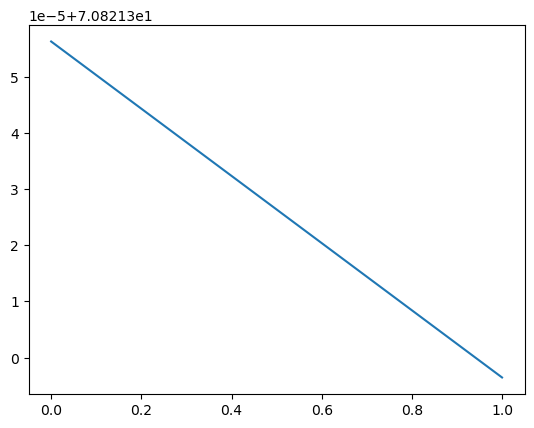

0
[-0.015 -0.068  0.799  0.597] [6.248 2.867 4.888 1.668]


In [76]:
mm.fit(X2, Y2)
plt.plot(mm.lvals)
plt.show()
print(mm.K)
print(mm.w, mm.c)

In [77]:
accuracy_score(Y2, np.sign(mm.evaluate(X2)))

0.97

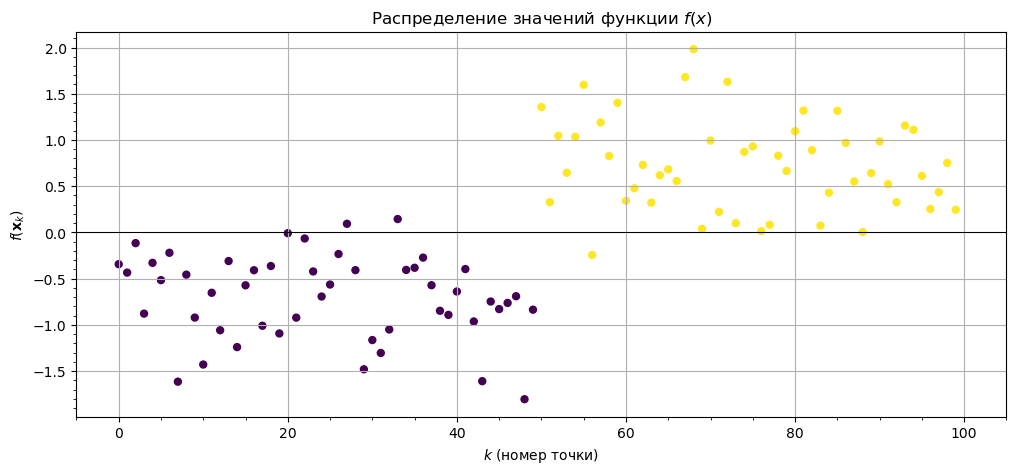

In [78]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(mm, X2, Y2)
plt.show()

In [79]:
X2_1 = X2 - np.outer((X2 - mm.c) @ mm.w, mm.w)

In [80]:
mm1 = MarginMaximization(Exp(-2.0), h=0.1)

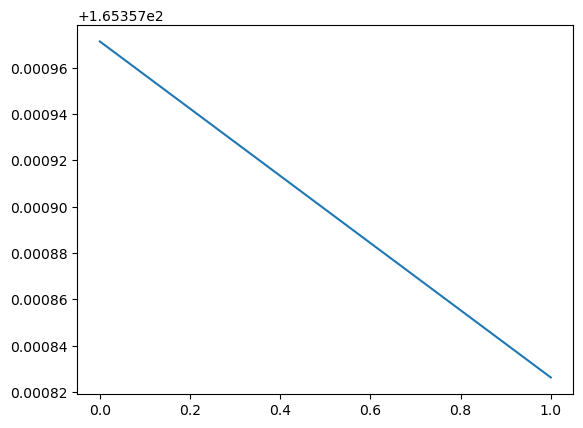

0
[ 0.158  0.624  0.494 -0.585] [6.208 2.856 4.883 1.671]


In [82]:
mm1.fit(X2_1, Y2)
plt.plot(mm1.lvals)
plt.show()
print(mm1.K)
print(mm1.w, mm1.c)

In [83]:
accuracy_score(Y2, np.sign(mm1.evaluate(X2_1)))

0.72

In [84]:
U1 = (X2 - mm.c) @ mm.w
U2 = (X2 - mm1.c) @ mm1.w

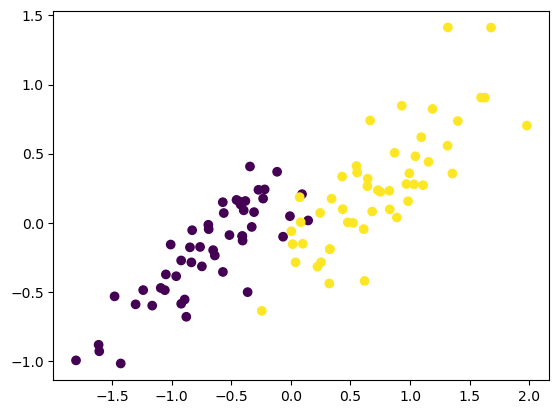

In [85]:
plt.scatter(U1, U2, c=Y2)

In [30]:
X2_2 = X2_1 - np.outer((X2_1-mm1.c) @ mm1.w, mm1.w)

In [31]:
mm2 = MarginMaximization(Hinge2(1.0), h=0.1)

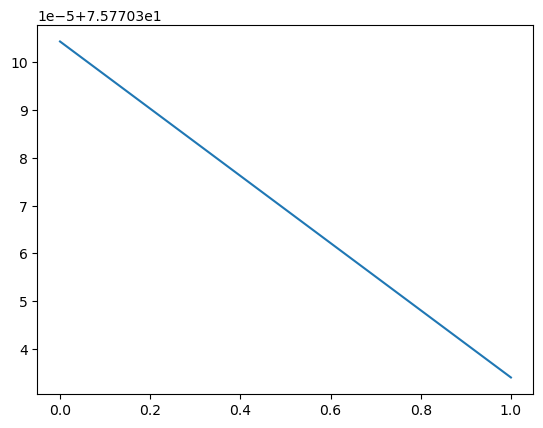

0
[ 0.862 -0.164 -0.271  0.396] [6.258 2.868 4.899 1.676]


In [33]:
mm2.fit(X2_2, Y2)
plt.plot(mm2.lvals)
plt.show()
print(mm2.K)
print(mm2.w, mm2.c)

In [34]:
accuracy_score(Y2, np.sign(mm2.evaluate(X2_2)))

0.7

In [35]:
U3 = (X2 - mm2.c) @ mm2.w

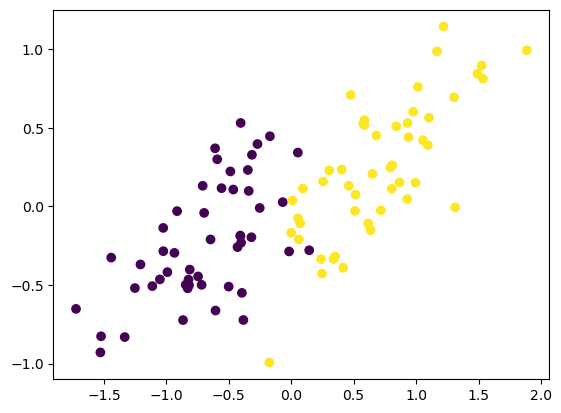

In [39]:
plt.scatter(U1, U3, c=Y2)

In [40]:
X2_3 = X2_2 - np.outer((X2_2 - mm2.c) @ mm2.w, mm2.w)

In [41]:
mm3 = MarginMaximization(Hinge2(1.0), h=0.1)

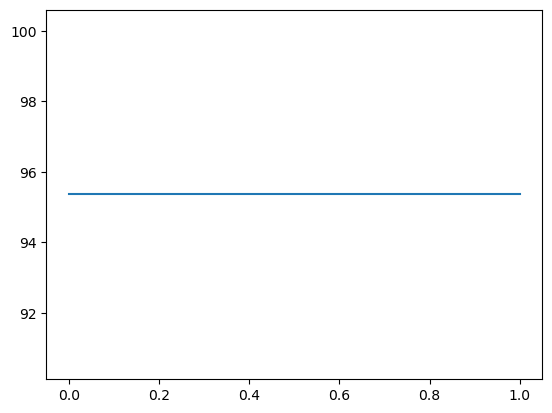

0
[ 0.278 -0.637  0.400 -0.597] [6.258 2.867 4.900 1.675]


In [42]:
mm3.fit(X2_3, Y2)
plt.plot(mm3.lvals)
plt.show()
print(mm3.K)
print(mm3.w, mm3.c)

In [43]:
X2_4 = X2_3 - np.outer((X2_3 - mm3.c) @ mm3.w, mm3.w)

In [44]:
mm4 = MarginMaximization(Hinge2(1.0), h=0.1)

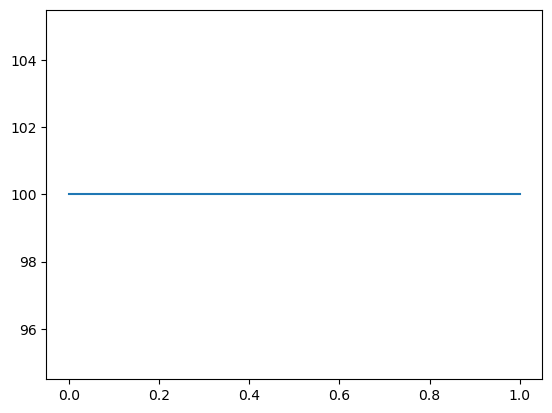

0
[ 0.943  0.236  0.000 -0.236] [6.258 2.867 4.900 1.675]


In [45]:
mm4.fit(X2_4, Y2)
plt.plot(mm4.lvals)
plt.show()
print(mm4.K)
print(mm4.w, mm4.c)

In [46]:
U4 = (X2 - mm4.c) @ mm4.w

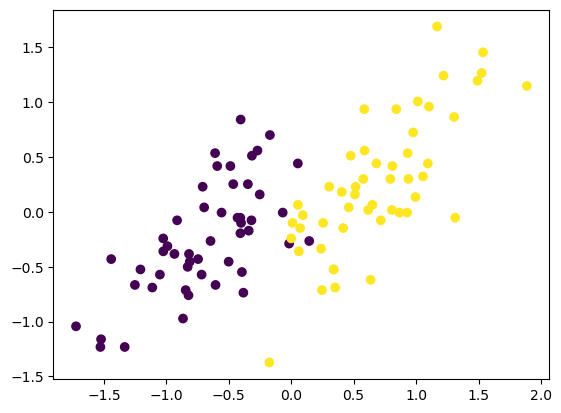

In [48]:
plt.scatter(U1, U4, c=Y2)